In [129]:
#Import dependicies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import scipy.stats as sts
from sklearn.linear_model import LinearRegression

In [130]:
 # Name of the CSV file
file = 'Resources/countries_of_the_world.csv'

In [131]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, encoding="ISO-8859-1")

In [132]:
#Preview the dataframe
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [133]:
#Create a dataframe with just the data that you need to show the area of each country
area_df = df[['Country','Region','Area (sq. mi.)']]
#area_df
area_df_grouped = area_df.groupby(['Region'])
#area_df_grouped.head()

In [134]:
#Consolidate the DF to region and area
area_totaled = area_df_grouped.sum()['Area (sq. mi.)']
#area_totaled
area_totaled_df = area_totaled.reset_index()
#area_totaled_df

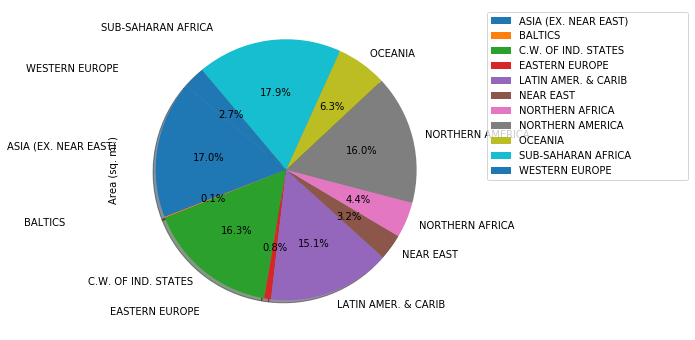

In [135]:
#Create a pie graph that displayed the data from the area dataframe
plot = area_totaled_df.plot.pie(y='Area (sq. mi.)', figsize=(6, 6), labels=area_totaled_df['Region'], 
                                autopct="%1.1f%%", shadow=True, startangle=140).legend(bbox_to_anchor=(1.1, 1))

plt.savefig('areapie')

In [136]:
#Create a dataframe from the original data that includes country, region, literacy %, phones per 1000, and population
new_df = df[['Country','Region','Population', 'Literacy (%)', 'Phones (per 1000)']]
new_df.head()

#Convert commas to decimals for literacy % and phones per 1000
literacy_converted= new_df['Literacy (%)'].str.replace(',','.')
literacy =  literacy_converted.astype(float)
phones_converted=new_df['Phones (per 1000)'].str.replace(',','.')
phones =  phones_converted.astype(float)
country = new_df['Country']

In [169]:
#Create DF to show just the columns you will plot
phone_literacy_df = pd.DataFrame({'Country': country, 'Literacy': literacy, 'Phones': phones})
#phone_literacy_df

#Remove all rows that do not have value:
phone_literacy_filtered = phone_literacy_df.dropna()
#print(len(phone_literacy_filtered))
#phone_literacy_filtered

#Create DF for only rows that are numeric:
phone_literacy_numeric = phone_literacy_filtered[['Literacy', 'Phones']]
#print(phone_literacy_numeric)
phone_literacy_numeric

In [138]:
#Create two separate list variables for the x and y axis - one for country vs literacy % and one for country vs phones per 1000
literacy = phone_literacy_numeric['Literacy']
phones = phone_literacy_numeric['Phones']
#print(literacy)
#print(phones)

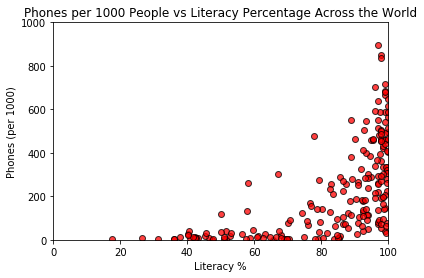

In [139]:
#Graph the data in a scatter plot
plt.scatter(literacy, phones, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Literacy %')
plt.ylabel('Phones (per 1000)')
plt.title('Phones per 1000 People vs Literacy Percentage Across the World')
plt.figsize=(200,200)

# format the x and y ticks
#plt.xticks([]),plt.yticks([])
plt.xlim(0,100)
plt.ylim(0,1000)
plt.show()

#correlation = st.pearsonr(literacy,phones)
#print(correlation)

y = 6.65x + -325.28


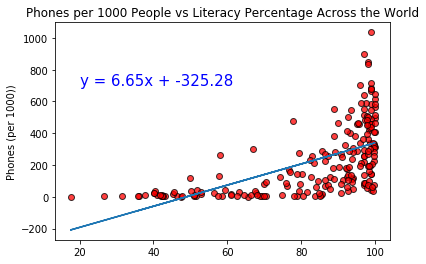

In [140]:
#Create a regression across the above scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(literacy, phones)
regress_values = literacy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(literacy, phones, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
print(line_eq)
plt.plot(literacy,regress_values)
plt.annotate(line_eq,(20,700),fontsize=15,color="blue")
plt.ylabel('Phones (per 1000))')
plt.title('Phones per 1000 People vs Literacy Percentage Across the World')
plt.figsize=(200,200)
plt.show()

In [151]:
#Create dataframe with Country, Region, and Net Migration
df_data = df[['Country', 'Region', 'Net migration']]
df_data.head()

,Country,Region,Net migration
0,Afghanistan,ASIA (EX. NEAR EAST),"23,06"
1,Albania,EASTERN EUROPE,"-4,93"
2,Algeria,NORTHERN AFRICA,"-0,39"
3,American Samoa,OCEANIA,"-20,71"
4,Andorra,WESTERN EUROPE,"6,6"


In [152]:
#Convert commas to decimals for net migration
migration_converted= df_data['Net migration'].str.replace(',','.')
migration =  migration_converted.astype(float)
country = df_data['Country']
region = df_data['Region']

In [177]:
#Convert values into new dataframe
migration_df = pd.DataFrame({'Country': country, 'Region': region, 'Net Migration': migration})
#migration_df

In [154]:
#Create a dataframe with just the data that you need
migration_grouped = migration_df.groupby(['Region']).mean()
migration_grouped_reset = migration_grouped.reset_index()
migration_grouped_reset.head()

,Region,Net Migration
0,ASIA (EX. NEAR EAST),1.372500
1,BALTICS,-2.033333
2,C.W. OF IND. STATES,-2.033333
3,EASTERN EUROPE,-0.647500
4,LATIN AMER. & CARIB,-1.494444


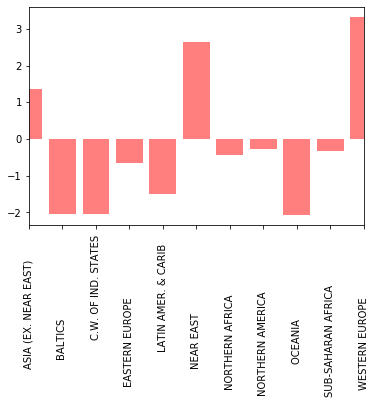

In [180]:
#Create the bar graph for Net Migration and Region
x=migration_grouped_reset["Region"]
y=migration_grouped_reset["Net Migration"]
# Shade the area between y1 and line y=0
plt.bar(x, y,
                 facecolor="red", # The fill color
                 color='blue',       # The outline color
                 alpha=0.5)          # Transparency of the fill
#Show the plot
#plt.ylim(0,y.max)
#plt.yticks(np.arange(0, 200))
#plt.xticks(rotation='horizontal')
plt.xticks(rotation='vertical')
#plt.yticks([])
plt.xlim(0,10)
plt.show()
#go through every row of the dataframe
#for row in data.itterrows():
#net migration / population density
#only plot top X

In [156]:
#Remove rows with data that does not exist
df = df.dropna()

In [157]:
#Remove commas from the numbers
df["Infant mortality (per 1000 births)"] = df["Infant mortality (per 1000 births)"].str.replace(',', ".")
df["Pop. Density (per sq. mi.)"] = df["Pop. Density (per sq. mi.)"].str.replace(',', ".")

/Users/juliedundas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juliedundas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
#Set the x-values and convert the numbers to floats
x_values = df["Infant mortality (per 1000 births)"].astype(float)
#x_values

In [159]:
#Set the y-values and convert the numbers to floats
y_values = df["Pop. Density (per sq. mi.)"].astype(float)
#y_values

In [160]:
#Check for outliers
df.sort_values(by=['Pop. Density (per sq. mi.)']).tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
77,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,"0,23","-0,64",51.43,2200.0,"74,8","14,4","16,26","9,67","74,07",2,"30,52","9,72","0,366","0,246","0,387"
168,Romania,EASTERN EUROPE,22303552,237500,93.9,"0,09","-0,13",26.43,7000.0,"98,4","196,9","40,82","2,25","56,93",3,"10,7","11,77","0,101","0,35","0,549"
12,Austria,WESTERN EUROPE,8192880,83870,97.7,"0,00",2,4.66,30000.0,"98,0","452,2","16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678"
202,Togo,SUB-SAHARAN AFRICA,5548702,56785,97.7,"0,10",0,66.61,1500.0,"60,9","10,6","46,15","2,21","51,64",2,"37,01","9,83","0,395","0,204","0,401"
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,"0,00","-6,47",23.28,3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [161]:
#Determine linear model for data
x = df["Infant mortality (per 1000 births)"].values.reshape(-1,1)
y = df["Pop. Density (per sq. mi.)"].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 512.16 + -5.5877X


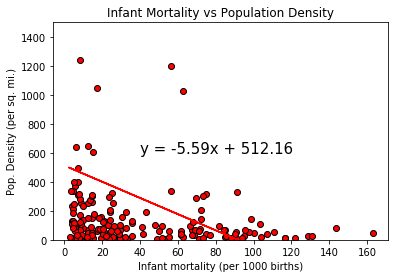

In [162]:
#Graph the data with the linear model included
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.plot(figsize=(100,500))
plt.ylim(0,1500)
plt.annotate(line_eq,(40,600),fontsize=15,color="black")
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Pop. Density (per sq. mi.)")
plt.title("Infant Mortality vs Population Density")
plt.show()

In [163]:
#Create variables for the next data frame
infant = df["Infant mortality (per 1000 births)"].astype(float)
pop = df["Pop. Density (per sq. mi.)"].astype(float)
country = df["Country"]
region = df["Region"]

In [164]:
#Create the dataframe 
combined_df = pd.DataFrame({"Country": country, "Region": region, "Infant mortality (per 1000 births)": infant, "Pop. Density (per sq. mi.)": pop})

In [165]:
#Show the new data frame
combined_df

,Country,Region,Infant mortality (per 1000 births),Pop. Density (per sq. mi.)
0,Afghanistan,ASIA (EX. NEAR EAST),163.07,48.0
1,Albania,EASTERN EUROPE,21.52,124.6
2,Algeria,NORTHERN AFRICA,31.00,13.8
6,Anguilla,LATIN AMER. & CARIB,21.03,132.1
7,Antigua & Barbuda,LATIN AMER. & CARIB,19.46,156.0
...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,22.20,28.2
219,Vietnam,ASIA (EX. NEAR EAST),25.95,256.1
224,Yemen,NEAR EAST,61.50,40.6
225,Zambia,SUB-SAHARAN AFRICA,88.29,15.3


In [166]:
#Use groupby to group the data frame by region
new_df_grouped = combined_df.groupby(["Region"]).sum()
new_df_grouped.head()

,Infant mortality (per 1000 births),Pop. Density (per sq. mi.)
Region,,
ASIA (EX. NEAR EAST),1055.45,35152.1
BALTICS,17.42,64.5
C.W. OF IND. STATES,477.11,540.1
EASTERN EUROPE,89.51,645.5
LATIN AMER. & CARIB,873.12,5930.5


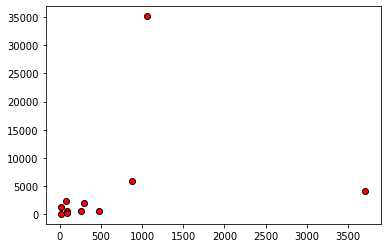

In [167]:
#Plot the dataframe in a scatter plot
plt.scatter(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"], marker="o", facecolors="red", edgecolors="black")
plt.show()

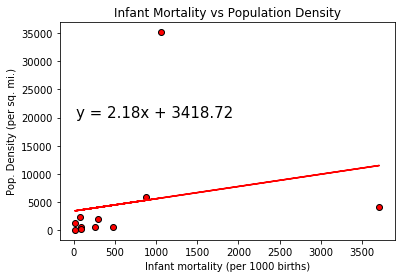

In [168]:
#Plot the dataframe with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"])
regress_values = new_df_grouped["Infant mortality (per 1000 births)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(new_df_grouped["Infant mortality (per 1000 births)"], new_df_grouped["Pop. Density (per sq. mi.)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(new_df_grouped["Infant mortality (per 1000 births)"],regress_values,"r-")
plt.annotate(line_eq,(30,20000),fontsize=15,color="black")
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Pop. Density (per sq. mi.)")
plt.title("Infant Mortality vs Population Density")
plt.show()